In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.ticker as mticker


In [ ]:
drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/mfarhaanheart-dataset.csv')          # Farhaan Khan dataset
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/Heart_disease_statlog.csv')  # Ritwik B3 Statlog dataset
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/johnsmith.csv')  # JohnSmith88 dataset
df4= pd.read_csv('/content/drive/MyDrive/Datasets/cleaned_cleveland_dataset.csv') # cleveland dataset
df5=pd.read_csv('/content/drive/MyDrive/Datasets/heart_data_sharmarosham.csv') #sharmarosham dataset
df6 = pd.read_csv('/content/drive/MyDrive/Datasets/heart_disease_uci.csv')  #zeeshanyounas001 heart-disease-uci



Mounted at /content/drive


In [ ]:
# Step 1: Drop unnecessary columns
df6.drop(columns=['id', 'dataset'], inplace=True)
print("Step 1 - Dropped unnecessary columns:\n", df6.columns)

# Step 2: Rename columns
df6.rename(columns={
    'thalch': 'thalachh',
    'num': 'target'
}, inplace=True)
print("Step 2 - Renamed columns:\n", df6.columns)

# Step 3: Encode categorical columns

# sex: Male/Female → 1/0
df6['sex'] = df6['sex'].map({'Male': 1, 'Female': 0})
print("Step 3a - Encoded 'sex':\n", df6['sex'].value_counts())

# cp: Chest pain type
cp_map = {
    'typical angina': 0,
    'atypical angina': 1,
    'non-anginal': 2,
    'asymptomatic': 3
}
df6['cp'] = df6['cp'].map(cp_map)
print("Step 3b - Encoded 'cp':\n", df6['cp'].value_counts())

# fbs and exang: True/False → 1/0
df6['fbs'] = df6['fbs'].map({True: 1, False: 0})
df6['exang'] = df6['exang'].map({True: 1, False: 0})
print("Step 3c - Encoded 'fbs':\n", df6['fbs'].value_counts())
print("Step 3d - Encoded 'exang':\n", df6['exang'].value_counts())

# restecg
restecg_map = {
    'normal': 0,
    'st-t abnormality': 1,
    'lv hypertrophy': 2
}
df6['restecg'] = df6['restecg'].map(restecg_map)
print("Step 3e - Encoded 'restecg':\n", df6['restecg'].value_counts())

# slope
slope_map = {
    'upsloping': 0,
    'flat': 1,
    'downsloping': 2
}
df6['slope'] = df6['slope'].map(slope_map)
print("Step 3f - Encoded 'slope':\n", df6['slope'].value_counts())

# thal
thal_map = {
    'normal': 1,
    'fixed defect': 2,
    'reversable defect': 3,
    'reversible defect': 3  # fix typo
}
df6['thal'] = df6['thal'].map(thal_map)
print("Step 3g - Encoded 'thal':\n", df6['thal'].value_counts())

# target: convert 0–4 to binary
df6['target'] = df6['target'].apply(lambda x: 1 if int(x) > 0 else 0)
print("Step 3h - Converted 'target' to binary:\n", df6['target'].value_counts())

# Step 4: Drop rows with missing values
initial_shape = df6.shape
df6.dropna(inplace=True)
print(f"Step 4 - Dropped rows with missing values: {initial_shape} → {df6.shape}")

# Step 5: Reorder columns
expected_order = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                  'restecg', 'thalachh', 'exang', 'oldpeak',
                  'slope', 'ca', 'thal', 'target']
df6 = df6[expected_order]
print("Step 5 - Reordered columns:\n", df6.columns.tolist())

# Step 6: Save to CSV
df6.to_csv("/content/drive/MyDrive/Datasets/heart_disease_uci_cleaned.csv", index=False)
print("Step 6 - Cleaned dataset saved. Final shape:", df6.shape)
print(df6.head())


Step 1 - Dropped unnecessary columns:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Step 2 - Renamed columns:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Step 3a - Encoded 'sex':
 sex
1    726
0    194
Name: count, dtype: int64
Step 3b - Encoded 'cp':
 cp
3    496
2    204
1    174
0     46
Name: count, dtype: int64
Step 3c - Encoded 'fbs':
 fbs
0.0    692
1.0    138
Name: count, dtype: int64
Step 3d - Encoded 'exang':
 exang
0.0    528
1.0    337
Name: count, dtype: int64
Step 3e - Encoded 'restecg':
 restecg
0.0    551
2.0    188
1.0    179
Name: count, dtype: int64
Step 3f - Encoded 'slope':
 slope
1.0    345
0.0    203
2.0     63
Name: count, dtype: int64
Step 3g - Encoded 'thal':
 thal
1.0    196
3.0    192
2.0     46
Name: count, dtype: int64
Step 3h - Conv

In [ ]:
# Step 1: Load and rename columns
cleveland_path = "/content/drive/MyDrive/Datasets/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class']

df_cleveland = pd.read_csv(cleveland_path, names=columns)
df_cleveland.columns = df_cleveland.columns.str.strip()
print("Step 1 - Loaded and assigned columns:\n", df_cleveland.head())


Step 1 - Loaded and assigned columns:
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  class  
0    3.0  0.0  6.0      0  
1    2.0  3.0  3.0      2  
2    2.0  2.0  7.0      1  
3    3.0  0.0  3.0      0  
4    1.0  0.0  3.0      0  


In [ ]:
# Step 2: Convert 'class' to binary target
df_cleveland['output'] = df_cleveland['class'].apply(lambda x: 1 if int(x) > 0 else 0)
df_cleveland.drop(columns='class', inplace=True)
print("Step 2 - Converted target to binary:\n", df_cleveland['output'].value_counts())

Step 2 - Converted target to binary:
 output
0    164
1    139
Name: count, dtype: int64


In [ ]:
# Step 3: Handle non-numeric entries in 'ca' and 'thal'
df_cleveland['ca'] = pd.to_numeric(df_cleveland['ca'], errors='coerce')
df_cleveland['thal'] = pd.to_numeric(df_cleveland['thal'], errors='coerce')
print("Step 3 - Converted 'ca' and 'thal' to numeric. Null counts:\n", df_cleveland[['ca', 'thal']].isnull().sum())

# Step 4: Drop rows with missing values
before_drop = df_cleveland.shape
df_cleveland_cleaned = df_cleveland.dropna()
df_cleveland_cleaned = df_cleveland_cleaned.astype(float)
print(f"Step 4 - Cleaned rows: {before_drop} → {df_cleveland_cleaned.shape}")
print(df_cleveland_cleaned.head())

Step 3 - Converted 'ca' and 'thal' to numeric. Null counts:
 ca      4
thal    2
dtype: int64
Step 4 - Cleaned rows: (303, 14) → (297, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  output  
0    3.0  0.0   6.0     0.0  
1    2.0  3.0   3.0     1.0  
2    2.0  2.0   7.0     1.0  
3    3.0  0.0   3.0     0.0  
4    1.0  0.0   3.0     0.0  


In [ ]:
df2.columns = df1.columns
df3.columns = df1.columns
df_cleveland_cleaned.columns=df1.columns
# Save to CSV
df_cleveland_cleaned.to_csv("/content/drive/MyDrive/Datasets/cleaned_cleveland_dataset.csv", index=False)

df4.columns=df1.columns
df5.columns=df1.columns
df6.columns=df1.columns


In [ ]:
#printing all columns
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)
print(df6.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
#Step 4: Concatenate Datasets
combined_df = pd.concat([df1, df2, df3,df4,df5,df6], axis=0, ignore_index=True)


In [ ]:
#Step 5: Clean Final Dataset
combined_df.drop_duplicates(inplace=True)


In [ ]:
#Shuffle the data
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
# Convert all float columns to int (if that makes sense for your data)
float_cols = combined_df.select_dtypes(include=['float']).columns
combined_df[float_cols] = combined_df[float_cols].astype(int)


In [ ]:
combined_df.to_csv('/content/drive/MyDrive/Datasets/multi_heart_dataset1.csv', index=False)
#/content/drive/MyDrive/Datasets/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from google.colab import drive

drive.mount('/content/drive')

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/multi_heart_dataset1.csv')

# Check class distribution before SMOTE
print("Original class distribution:")
print(df['target'].value_counts())

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Apply SMOTE only if more than one class
if len(y.unique()) > 1:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Recombine into a new DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    df_resampled['target'] = y_resampled

    # Show new class distribution
    print("\nAfter SMOTE class distribution:")
    print(df_resampled['target'].value_counts())

    print(f"\nOriginal samples: {len(df)}")
    print(f"After SMOTE samples: {len(df_resampled)}")

    # Save resampled dataset
    df_resampled.to_csv('/content/drive/MyDrive/Datasets/multi_heart_dataset1_smote.csv', index=False)
else:
    print("SMOTE cannot be applied: only one class present in 'target'.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original class distribution:
target
0    480
1    448
Name: count, dtype: int64

After SMOTE class distribution:
target
0    480
1    480
Name: count, dtype: int64

Original samples: 928
After SMOTE samples: 960


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/multi_heart_dataset1.csv')
X = df.drop('target', axis=1)
y = df['target']

# SMOTE to boost both classes to 1500
smote = SMOTE(sampling_strategy={0: 1500, 1: 1500}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine and save
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['target'] = y_resampled
df_resampled.to_csv('sample_data/multi_heart_dataset1_big.csv', index=False)

print("After SMOTE class distribution:")
print(df_resampled['target'].value_counts())
print("Total samples:", len(df_resampled))


After SMOTE class distribution:
target
0    1500
1    1500
Name: count, dtype: int64
Total samples: 3000


Epoch 1/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5939 - loss: 0.6490 - val_accuracy: 0.7283 - val_loss: 0.5443
Epoch 2/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7038 - loss: 0.5626 - val_accuracy: 0.7400 - val_loss: 0.5112
Epoch 3/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7463 - loss: 0.5102 - val_accuracy: 0.7533 - val_loss: 0.4994
Epoch 4/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.5044 - val_accuracy: 0.7650 - val_loss: 0.4815
Epoch 5/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7592 - loss: 0.4820 - val_accuracy: 0.7867 - val_loss: 0.4642
Epoch 6/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7479 - loss: 0.5054 - val_accuracy: 0.7500 - val_loss: 0.4728
Epoch 7/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7678 - loss: 0.4827 - val_accuracy: 0.7850 - val_loss: 0.4533
Epoch 8/300
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7807 - loss: 0.4658 - val_accu

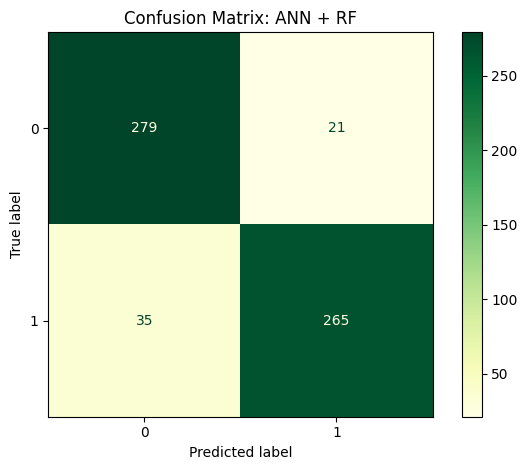

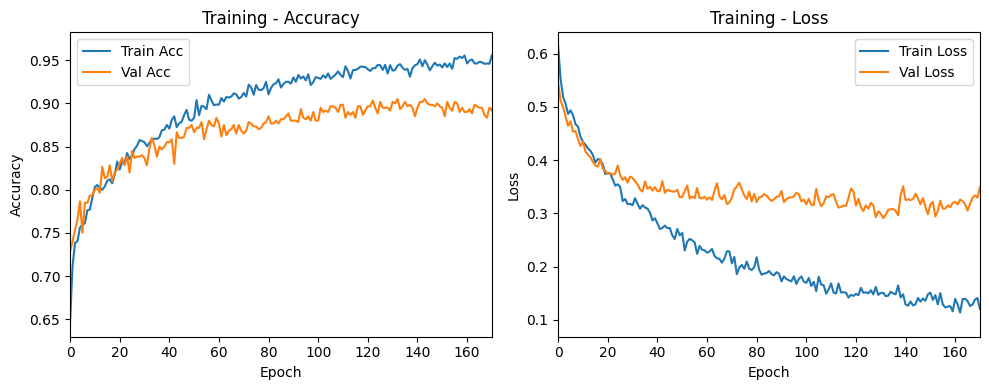


✅ Model saved as 'fine_tuned_binary_ann_model.h5'


In [ ]:
# 📦 Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.ticker as mticker


# 📁 Step 1: Load Data
df = pd.read_csv('/content/drive/MyDrive/Datasets/multi_heart_dataset1_big.csv')
X = df.drop('target', axis=1)
y = df['target']

# 🔁 Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📤 Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 🧠 Step 2: Functional ANN Model for Feature Extraction
def create_functional_ann(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(256, activation='relu')(inputs)
    x = Dropout(0.4)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)  # <- We will extract this
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 🔧 Build & Train
binary_ann = create_functional_ann(X_train.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

history = binary_ann.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=20,
    verbose=1,
    callbacks=[early_stop]
)

# 📤 Step 3: Extract Features from Penultimate Layer
feature_extractor = Model(inputs=binary_ann.input, outputs=binary_ann.layers[-2].output)
X_train_feat = feature_extractor.predict(X_train)
X_test_feat = feature_extractor.predict(X_test)

# 🌲 Step 4: Train Random Forest on Deep Features
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_feat, y_train)
rf_preds = rf.predict(X_test_feat)

# 📊 Step 5: Evaluation
accuracy = accuracy_score(y_test, rf_preds)
print(f"\n✅ Hybrid ANN + RF Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_preds))

# 📌 Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, cmap='YlGn')
plt.title("Confusion Matrix: ANN + RF")
plt.tight_layout()
plt.show()

def plot_history(history, title="Training"):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
    plt.figure(figsize=(10, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.xlim([0, 170])
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.xlim([0, 170])
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()


plot_history(history)

# 💾 Save
binary_ann.save("fine_tuned_binary_ann_model.h5")
print("\n✅ Model saved as 'fine_tuned_binary_ann_model.h5'")


Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5542 - loss: 0.7094 - val_accuracy: 0.6500 - val_loss: 0.5765
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7142 - loss: 0.5894 - val_accuracy: 0.8500 - val_loss: 0.4934
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7723 - loss: 0.5382 - val_accuracy: 0.8667 - val_loss: 0.4214
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7732 - loss: 0.5142 - val_accuracy: 0.8667 - val_loss: 0.3719
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8545 - loss: 0.3848 - val_accuracy: 0.8333 - val_loss: 0.3263
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8462 - loss: 0.4181 - val_accuracy: 0.8500 - val_loss: 0.3003
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8089 - loss: 0.4219 - val_accuracy: 0.8500 - val_loss: 0.2970
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8511 - loss: 0.3711 - val_accuracy: 0.8500 - 

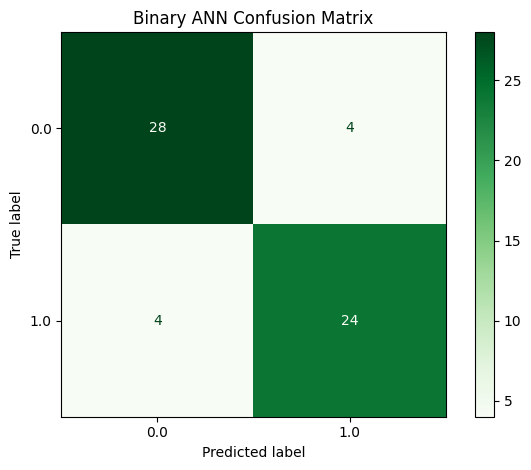


Binary ANN Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        32
         1.0       0.86      0.86      0.86        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



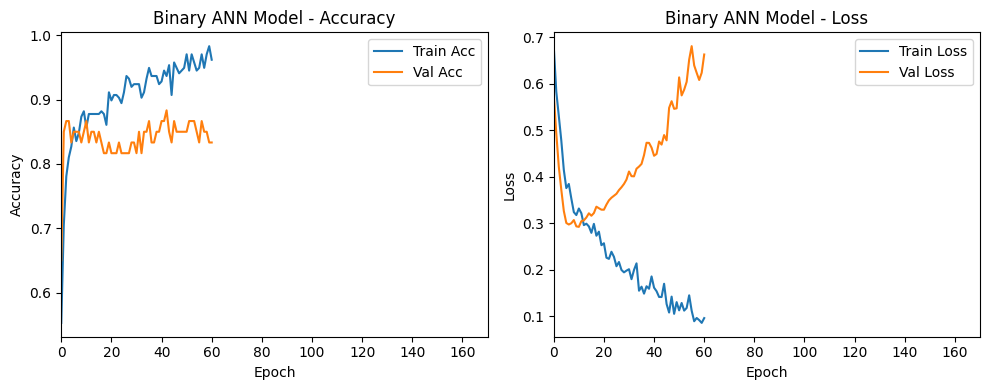

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

✅ Hybrid ANN + RF Accuracy: 0.8833

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        32
         1.0       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



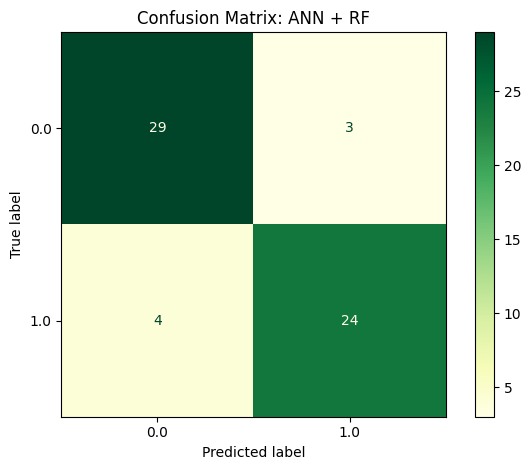


✅ Model saved as 'fine_tuned_binary_ann_model.h5'


In [26]:
# 📦 Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.ticker as mticker

# 📁 Step 1: Load Data
df = pd.read_csv('/content/drive/MyDrive/Datasets/cleaned_cleveland_dataset.csv')
X = df.drop('target', axis=1)
y = df['target']

# 🔁 Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📤 Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 🧠 Step 2: Functional ANN Model (Binary)
def create_functional_ann(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(256, activation='relu')(inputs)
    x = Dropout(0.4)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)  # Feature extraction layer
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 🔧 Build & Train ANN
binary_ann = create_functional_ann(X_train.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

ann_history = binary_ann.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=20,
    verbose=1,
    callbacks=[early_stop]
)

# 📈 Evaluate ANN
ann_loss, ann_acc = binary_ann.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Binary ANN Accuracy: {ann_acc:.4f}")

# 📊 Confusion Matrix for ANN
y_pred_ann = (binary_ann.predict(X_test) > 0.5).astype(int).flatten()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ann, cmap='Greens')
plt.title("Binary ANN Confusion Matrix")
plt.tight_layout()
plt.show()

print("\nBinary ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))

# 📉 Plot ANN Training
def plot_history(history, title="Training"):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.xlim([0, 170])
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.xlim([0, 170])
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    plt.tight_layout()
    plt.show()

plot_history(ann_history, "Binary ANN Model")

# 🧬 Step 3: Extract Features from Penultimate Layer
feature_extractor = Model(inputs=binary_ann.input, outputs=binary_ann.layers[-2].output)
X_train_feat = feature_extractor.predict(X_train)
X_test_feat = feature_extractor.predict(X_test)

# 🌲 Step 4: Train Random Forest on Deep Features
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_feat, y_train)
rf_preds = rf.predict(X_test_feat)

# 📊 Step 5: Evaluate Hybrid ANN + RF
hybrid_acc = accuracy_score(y_test, rf_preds)
print(f"\n✅ Hybrid ANN + RF Accuracy: {hybrid_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_preds))

# 📌 Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, cmap='YlGn')
plt.title("Confusion Matrix: ANN + RF")
plt.tight_layout()
plt.show()

# 💾 Save ANN
binary_ann.save("fine_tuned_binary_ann_model.h5")
print("\n✅ Model saved as 'fine_tuned_binary_ann_model.h5'")


In [28]:
# --- 📘 LIME EXPLANATION FOR FUNCTIONAL BINARY ANN MODEL ---

import lime
import lime.lime_tabular
import numpy as np

print("\n🔍 LIME Explanation (on sample index 5):")

# Create LIME explainer using the ANN training data
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns.tolist(),
    class_names=['No Disease', 'Disease'],
    discretize_continuous=True
)

# Pick one test instance to explain
sample_idx = 5
sample = X_test[sample_idx]

# Define a LIME-compatible prediction function for ANN
def predict_fn(x):
    preds = binary_ann.predict(x)
    # Convert to 2D probability [No Disease, Disease]
    return np.concatenate([(1 - preds), preds], axis=1)

# Generate LIME explanation
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=predict_fn,
    num_features=10
)

# Show explanation in notebook
lime_exp.show_in_notebook(show_table=True, show_all=False)



🔍 LIME Explanation (on sample index 5):
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
!pip install lime

In [29]:
print(df['target'].value_counts())

target
0.0    160
1.0    137
Name: count, dtype: int64


In [ ]:
!pip install tensorflow


In [31]:
import numpy as np
from tensorflow.keras.models import load_model

# ✅ Load the correct binary classification model
binary_model = load_model("fine_tuned_binary_ann_model.h5")

# Input data (same column order)
user_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
user_data_scaled = scaler.transform(user_data)

# Predict
pred = binary_model.predict(user_data_scaled)

# Interpret result
if pred[0][0] > 0.5:
    print("🩺 Binary Model: High risk of heart disease")
else:
    print("💖 Binary Model: Low risk of heart disease")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
💖 Binary Model: Low risk of heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# # Load model
# multi_model = load_model("multi_class_ann_model.h5")

# # Input: same shape and order as training data
# user_input = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
# user_input_scaled = scaler.transform(user_input)

# # Predict
# prediction = multi_model.predict(user_input_scaled)
# prediction_class = np.argmax(prediction)

# if prediction_class == 1:
#     print("🩺 Multi-Class: High risk of heart disease")
# else:
#     print("💖 Multi-Class: Low risk of heart disease")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
🩺 Multi-Class: High risk of heart disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
